In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.linalg import eig

from k_means import k_means
from markov_state_model import evaluate_structures
from markov_state_model import transition_matrix, state_prob
from local_optimization import process_file, steepest_descent

In [ ]:
kinetic_data = np.loadtxt("../../data/rate_vs_conc-1.dat")
kinetic_data = pd.DataFrame(kinetic_data, columns=["Substrate", "Rate"])
kinetic_data.head()

In [ ]:
def michaelis_menten(s, v_max, k_m):
    return (v_max * s) / (k_m + s)

In [ ]:
s = kinetic_data["Substrate"].to_numpy()
rate = kinetic_data["Rate"].to_numpy()
beta_hat, cov = curve_fit(michaelis_menten, s, rate)
v_max, k_m = beta_hat
print("v_max:", v_max)
print("k_m", k_m)
print("Covariance Matrix:")
print(cov)
print("Variance - v_max:", cov[0][0])
print("Variance - k_m:", cov[1][1])

In [ ]:
y_hat = michaelis_menten(s, v_max, k_m)
plt.figure()

plt.plot(s, y_hat, label="M-M Curve Fit", color="Red")
plt.scatter(s, rate, label="Kinetic Data", color="Black")
plt.xlabel("[Substrate] (M)")
plt.ylabel("Rate (M/s)")
plt.legend()
plt.title("Nonlinear Fit - Michaelis Menten Kinetics")
plt.savefig("../../data/michaelis_menten.png")
plt.show()

In [2]:
cluster_data = np.loadtxt("../../data/clust_data-1.dat")
cluster_data

array([[-1.1339681 ,  2.8831157 ],
       [ 1.1843365 ,  2.6798038 ],
       [-4.5383877 ,  3.8175163 ],
       [-0.19499936,  3.4901592 ],
       [-0.63064436,  3.7652512 ],
       [-1.7356955 ,  3.778279  ],
       [ 2.9580958 ,  1.5196948 ],
       [-1.2028138 ,  3.540364  ],
       [ 2.6218993 ,  2.908461  ],
       [ 3.9275227 ,  2.2397476 ],
       [ 0.52938876,  2.3064046 ],
       [ 1.833398  ,  4.2814578 ],
       [ 2.9185519 ,  2.1902624 ],
       [ 0.75706595,  1.7631816 ],
       [ 2.6226104 ,  3.2146864 ],
       [-2.7876945 ,  5.0107718 ],
       [ 4.3312715 ,  3.0255544 ],
       [-1.968688  ,  3.3082994 ],
       [-4.4865078 ,  2.0617528 ],
       [ 5.1534955 ,  4.674216  ],
       [ 0.81181962,  3.1249882 ],
       [ 2.3467634 ,  3.5301013 ],
       [-0.08977542,  2.0479318 ],
       [-2.0617502 ,  3.8540428 ],
       [-8.2189656 ,  3.3891457 ],
       [ 2.878837  ,  1.8439989 ],
       [ 0.1399464 ,  3.0397401 ],
       [ 0.40797128,  2.5494014 ],
       [ 2.2168161 ,

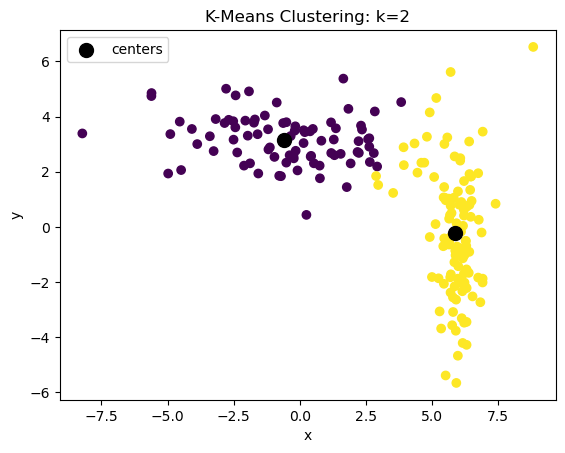

In [24]:
centers, clusters  = k_means(cluster_data, k=2)
plt.figure()
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1], label='centers', s=100, c='black')
plt.legend()
plt.title("K-Means Clustering: k=2")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("../../data/k_means_2.png")
plt.show()

In [25]:
print("Cluster means k=2: ")
print("Cluster 1:", centers[0, :])
print("Cluster 2:", centers[1, :])

Cluster means k=2: 
Cluster 1: [-0.60854901  3.16366945]
Cluster 2: [ 5.8439165  -0.22208368]


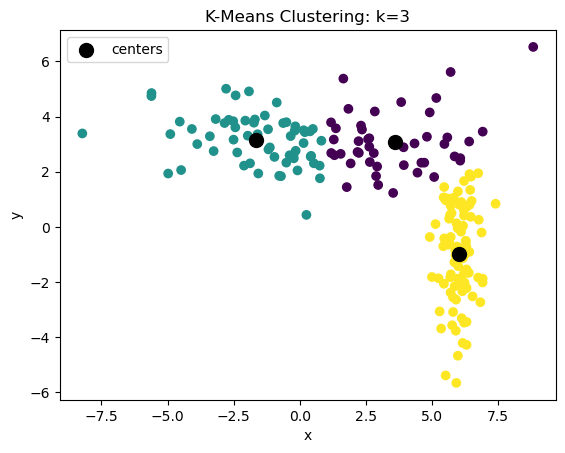

In [29]:
centers, clusters  = k_means(cluster_data, k=3)
plt.figure()
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1], label='centers', s=100, c='black')
plt.legend()
plt.title("K-Means Clustering: k=3")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("../../data/k_means_3.png")
plt.show()

In [27]:
print("Cluster means k=2: ")
print("Cluster 1:", centers[0, :])
print("Cluster 2:", centers[1, :])
print("Cluster 3:", centers[2, :])

Cluster means k=2: 
Cluster 1: [ 6.01825375 -0.96483458]
Cluster 2: [3.5807373  3.07755877]
Cluster 3: [-1.6606437   3.16283192]


In [28]:
centers, clusters  = k_means(cluster_data, k=3)
print("Cluster means k=2: ")
print("Cluster 1:", centers[0, :])
print("Cluster 2:", centers[1, :])
print("Cluster 3:", centers[2, :])

Cluster means k=2: 
Cluster 1: [-1.2986962   3.20428258]
Cluster 2: [ 6.02035586 -1.6323271 ]
Cluster 3: [4.80123969 2.27061851]


The clusters are based off of the initial guesses which are random, so repeated trials gives similar but not exactly identical results

In [2]:
langevian_x = np.genfromtxt("../../data/TrajectoryData/Xvstime.dat", delimiter='  ').T
langevian_y = np.genfromtxt("../../data/TrajectoryData/Yvstime.dat", delimiter='  ').T
langevian_z = np.genfromtxt("../../data/TrajectoryData/Zvstime.dat", delimiter='  ').T

In [3]:
structures = evaluate_structures(langevian_x, langevian_y, langevian_z)
structures[:100]

array([[2.56024458, 1.99799247, 1.68688453, 2.53468805, 2.05152774,
        1.22833835, 1.75365653],
       [2.56816975, 2.00604497, 1.69754974, 2.53905573, 2.04989899,
        1.22489291, 1.75945353],
       [2.57601283, 2.01419091, 1.70828217, 2.543278  , 2.04845094,
        1.22144248, 1.76514045],
       [2.5839332 , 2.02242072, 1.71904326, 2.54769428, 2.04697809,
        1.21806284, 1.77087947],
       [2.59187993, 2.03072541, 1.72988291, 2.55201479, 2.04539262,
        1.21457752, 1.77661511],
       [2.59979604, 2.03922555, 1.74076969, 2.55632537, 2.04371765,
        1.21105447, 1.78225188],
       [2.60787016, 2.04798483, 1.75178462, 2.56055427, 2.04232898,
        1.20752638, 1.78786743],
       [2.61592563, 2.05692207, 1.76286638, 2.56477516, 2.04101924,
        1.20386432, 1.79363508],
       [2.62400903, 2.06597486, 1.77393324, 2.56891111, 2.03977762,
        1.20017903, 1.7994724 ],
       [2.63185973, 2.07503278, 1.78475619, 2.57305596, 2.0384888 ,
        1.19646546, 1.8

In [4]:
centers, clusters = k_means(structures, k=6)
centers

array([[3.69640305, 1.75411625, 1.90495907, 1.92659101, 1.96865186,
        3.41944172, 2.9252446 ],
       [4.79061517, 2.31603828, 2.80905352, 2.68415308, 2.05020816,
        2.77672785, 2.31643536],
       [1.88148785, 2.0340673 , 2.42347615, 1.89573774, 1.68453491,
        2.65745803, 2.4950387 ],
       [3.28126203, 2.3460527 , 2.88162026, 2.59934989, 1.79904783,
        1.82878579, 1.83352478],
       [3.10143137, 1.71366513, 1.77580161, 1.86138666, 1.78816097,
        2.26896733, 2.00900015],
       [1.97896478, 1.71703036, 1.8206118 , 2.00686812, 1.94216844,
        1.60946307, 1.66883073]])

In [5]:
t_mat = transition_matrix(clusters, step_dist=50)
t_mat

array([[8.34804345e-01, 4.65374645e-02, 2.51512159e-02, 6.34180965e-03,
        8.71651648e-02, 0.00000000e+00],
       [5.15595735e-02, 8.67616338e-01, 0.00000000e+00, 6.17346204e-02,
        1.90894684e-02, 0.00000000e+00],
       [2.65559697e-02, 2.03320908e-04, 8.42369818e-01, 2.17666328e-02,
        3.44967808e-02, 7.46074777e-02],
       [4.66185742e-03, 4.54310007e-02, 3.45280659e-02, 8.14864882e-01,
        5.87217162e-02, 4.17924779e-02],
       [5.14739867e-02, 7.24433816e-03, 2.93591624e-02, 5.26997970e-02,
        7.91109861e-01, 6.81128549e-02],
       [0.00000000e+00, 0.00000000e+00, 5.93384695e-02, 3.26495027e-02,
        5.67496397e-02, 8.51262388e-01]])

In [6]:
t_mat_100 = transition_matrix(clusters, step_dist=100)
t_mat_100

array([[6.94698185e-01, 7.99746945e-02, 4.76484385e-02, 1.94420442e-02,
        1.54641402e-01, 3.59523516e-03],
       [9.60416367e-02, 7.54052010e-01, 0.00000000e+00, 1.06648898e-01,
        4.28612592e-02, 3.96196513e-04],
       [4.96103016e-02, 2.67705862e-03, 7.11465040e-01, 4.24262962e-02,
        5.97989382e-02, 1.34022365e-01],
       [1.59791664e-02, 7.92384612e-02, 6.44223354e-02, 6.60278371e-01,
        9.58497149e-02, 8.42319507e-02],
       [8.72937725e-02, 1.97837751e-02, 5.10318912e-02, 9.11621084e-02,
        6.30950706e-01, 1.19777747e-01],
       [9.69699126e-04, 0.00000000e+00, 1.09255734e-01, 6.12867641e-02,
        1.01880683e-01, 7.26607121e-01]])

In [7]:
p_mat = state_prob(clusters)
p_mat

array([0.12961574, 0.11105578, 0.17705965, 0.15840568, 0.1990516 ,
       0.22481155])

In [8]:
l_eigenvalues = eig(t_mat, left=True)[0]
l_eigenvectors = eig(t_mat, left=True)[1]
l_eigenvalues

array([1.        +0.j, 0.70473179+0.j, 0.89915567+0.j, 0.8299564 +0.j,
       0.7959263 +0.j, 0.77225747+0.j])

In [9]:
eq_prob = l_eigenvectors[0]
eq_prob

array([ 0.3093319 ,  0.38350186,  0.30389935,  0.69117904, -0.16351552,
        0.03584668])

In [10]:
next_eigenvector = l_eigenvectors[2]
next_eigenvector

array([ 0.42232512, -0.13843977, -0.41994192, -0.01941885,  0.68184622,
       -0.20028721])

In [11]:
negative_states = []
positive_states = []
for i in range(len(eq_prob)):
    if eq_prob[i] < 0:
        negative_states.append(eq_prob[i])
    else:
        positive_states.append(eq_prob[i])

    if next_eigenvector[i] < 0:
        negative_states.append(next_eigenvector[i])
    else:
        positive_states.append(next_eigenvector[i])
print(negative_states)
print(positive_states)

[-0.13843977440156321, -0.41994192294243204, -0.019418849829678758, -0.16351551860582011, -0.20028720735700692]
[0.3093319035019263, 0.42232512129182664, 0.38350186099529754, 0.30389935161200293, 0.6911790365569334, 0.681846215892196, 0.03584668296045434]


In [2]:
df_protein = process_file("../../data/onesequence_-22.79-1.dat")
df_protein.head()

,H/P,x,y,z
0,P,15.626935,-6.711419,8.136027
1,H,15.872621,-7.125660,7.267731
2,P,14.843317,-8.036397,7.438536
3,H,14.484313,-7.187576,7.600217
4,H,13.614839,-7.354948,7.633506


In [5]:
energy_min, configuration_min = steepest_descent(df_protein, 0.001)

-22.791333899668565
-25.050844529756382
-26.550017443710814
-27.82284719161801
-28.966061053085035
-30.015198767561692
-30.98760040547281
-31.89349118567907
-32.73989576495392
-33.53228955083941
-34.27535910398921
-34.97334837142433
-35.630189822777574
-36.249521290686324
-36.834649946803474
-37.38850520254869
-37.91360847735631
-38.41207521586958
-38.88565278025771
-39.335787998774485
-39.763711507251784
-40.1705233335764
-40.557265448972636
-40.9249715033188
-41.27469027537043
-41.607485674625515
-41.9244206619222
-42.22653413219073
-42.51481864697135
-42.79020393562949
-43.05354774958607
-43.305633147601846
-43.54717013838977
-43.778799660334414
-44.00109859875114
-44.214585355111765
-44.41972601881611
-44.616941344095416
-44.80661459049787
-44.98910001021587
-45.16473150766981
-45.3338308452138
-45.49671475245008
-45.65370040293822
-45.80510891664231
-45.951266786081604
-46.092505364534404
-46.22915875622784
-46.36156058196314
-46.490040144892916
-46.61491849295549
-46.736504784342

In [22]:
print("The energy minimum was", energy_min, "J")
print("The final configuration:")
configuration_min

The energy minimum was -66.67350511030344 J
The final configuration:


array([[15.21813644, -6.79274985,  7.8115033 ],
       [15.31214508, -7.46019642,  7.28078507],
       [15.08132095, -7.86855379,  7.55821922],
       [14.55454081, -6.84285304,  6.87915362],
       [14.20417307, -7.28164499,  7.58861962],
       [13.52841533, -7.20928866,  6.95668561],
       [13.41226554, -8.04030337,  7.44002515],
       [13.28427828, -8.16210763,  6.49702312],
       [13.7867787 , -8.64980332,  6.0412998 ],
       [13.92446432, -8.92781514,  6.9973977 ],
       [14.34193844, -8.21769543,  6.90174645],
       [14.36851849, -7.88145463,  6.6758134 ],
       [14.10390649, -7.52919621,  6.04820158],
       [14.73978021, -8.26151584,  5.71127138],
       [14.77263701, -9.05155186,  6.2937138 ],
       [15.61477989, -8.96509753,  5.79290935],
       [15.82506647, -8.04688567,  5.57054987],
       [16.43319156, -8.31462061,  6.25380484],
       [16.06798744, -7.37296282,  6.45773103],
       [15.20373454, -7.39774389,  6.19174443],
       [15.40165121, -8.23948501,  6.581

The convergence criteria was chosen as the point where the new coordinates where not detectably different (to python's level of precision) from the old ones, which means 
the gradient was ~0, at that point we must be at a local minima

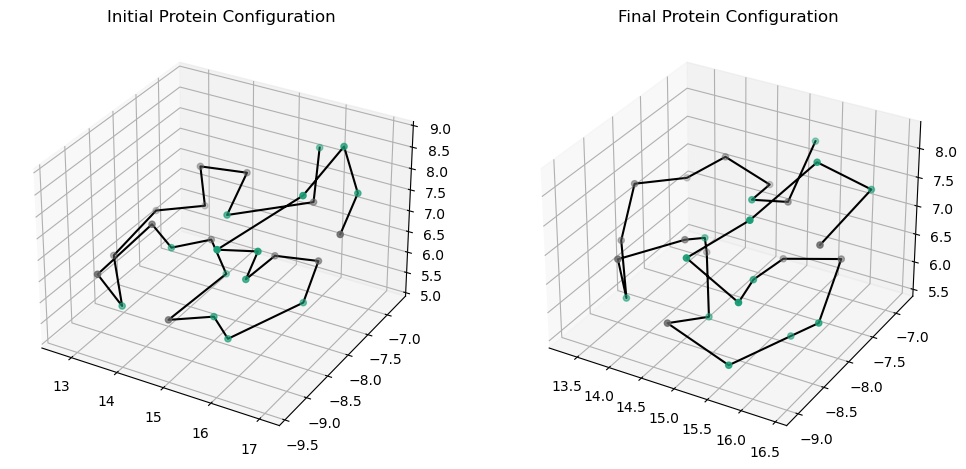

In [42]:
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=[12,6])
color_map = []
for res in df_protein['H/P'].to_numpy():
    if res == 'H':
        color_map.append(1)
    else:
        color_map.append(0)

axs[0].scatter(df_protein['x'].to_numpy(), df_protein['y'].to_numpy(), df_protein['z'].to_numpy(), c=color_map, cmap='Dark2')
axs[0].plot(df_protein['x'].to_numpy(), df_protein['y'].to_numpy(), df_protein['z'].to_numpy(), c='black')
axs[0].set_title("Initial Protein Configuration")

axs[1].scatter(configuration_min[:, 0], configuration_min[:, 1], configuration_min[:, 2], c=color_map, cmap='Dark2')
axs[1].plot(configuration_min[:, 0], configuration_min[:, 1], configuration_min[:, 2], c='black')
axs[1].set_title("Final Protein Configuration")

plt.savefig("../../data/steepest_descent_protein.png")